# Data Visualization 


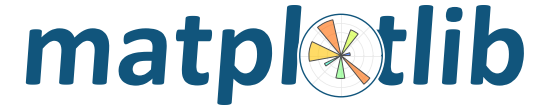

## Matplotlib

Matplotlib is an important library for creating static, animated, and interactive figure visualizations in Python.

- <code>figsize</code>: Defines the width and height of the figure in inches. The first value in paranthesis is width,and the second one is height.
- <code>plt.xlabel()</code> : Sets the label for the **x-axis**.
- <code>plt.ylabel()</code> : Sets the label for the **y-axis**.
- <code>plt.title()</code> : Specifies title of the visualization.
- <code>plt.show()</code> : Displays figures. If we do not write this code, the graph will be generated, however, would not be displayed on screen.




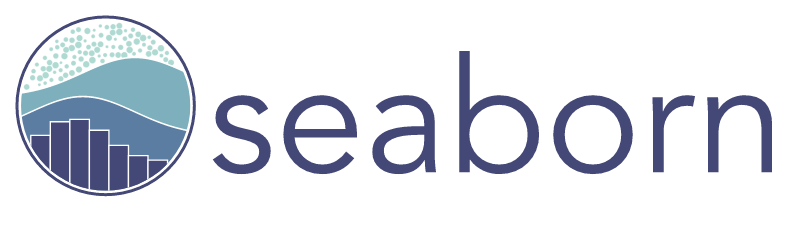

## Seaborn

Seaborn is a library that uses Matplotlib underneath to plot graphs. 
It provides a high-level interface for drawing attractive and informative statistical graphics.



In [69]:
# Import Matplotlib ve Seaborn libraries

import matplotlib.pyplot as plt
import seaborn as sns


# Import pandas portion of the code to tell Python to bring the pandas data analysis library into our current environment.

import pandas as pd

In [70]:
df = pd.read_csv('credit_card_fixed.csv')

In [71]:
# Check the number of rows, number of columns of data set

df.shape

(451, 8)

In [72]:
#Access the first n (which is 10) rows of a data frame (df) of series

df.head(n = 10)

,have_credit_card,card_no,user_id,user_gender,user_age,user_city,total_amount,card_delivery_date
0,Yes,9871326599442434,1,Female,51,Edirne,3466,2022-01-03
1,Yes,5866643196858919,2,Male,33,İstanbul,2770,2022-01-22
2,Yes,5934969821915385,4,Female,45,İzmir,3990,2022-01-29
3,Yes,4583682992593297,5,Female,33,İstanbul,1876,2022-02-18
4,Yes,9834784352689854,6,Male,41,Ankara,4797,2022-02-07
5,Yes,1589797529681697,7,Male,55,Kocaeli,5164,2022-02-27
6,Yes,8976879654146946,8,Female,43,Amasya,4296,2022-01-13
7,Yes,4149817943357734,9,Male,26,Ankara,2099,2022-02-15
8,Yes,4448553446993154,10,Female,43,İzmir,5798,2022-01-18
9,Yes,9339661937631297,11,Male,51,Antalya,6595,2022-01-19


In [73]:
# Check the statistical descriptions out of the data 

df.describe()

,card_no,user_id,user_age,total_amount
count,4.510000e+02,451.000000,451.000000,451.000000
mean,5.574467e+15,249.853659,37.935698,3548.472284
std,2.631093e+15,144.039611,11.903233,1651.923984
min,1.112777e+15,1.000000,18.000000,725.000000
25%,3.377820e+15,122.500000,28.000000,2154.500000
50%,5.497366e+15,253.000000,37.000000,3295.000000
75%,7.849892e+15,374.500000,48.500000,4661.500000
max,9.982414e+15,500.000000,59.000000,8555.000000


# Grouping Data in Python


<code>groupby</code> function is used to split the data into groups based on some criteria such as mean, min, max value, standard deviation. It is stated by <code>agg</code> which is an alias for aggregate.




In [74]:
# Age averages of users based on cities they live

df.groupby('user_city').agg({'user_age':'mean'})

,user_age
user_city,
Amasya,37.605263
Ankara,37.416667
Antalya,40.146341
Bursa,40.523810
Edirne,38.742857
Kocaeli,37.382353
İstanbul,36.868852
İzmir,37.558140


In [75]:
# Max and min ages based on city names 

df.groupby('user_city').agg({'user_age': 'min'})

,user_age
user_city,
Amasya,18
Ankara,18
Antalya,18
Bursa,20
Edirne,18
Kocaeli,18
İstanbul,18
İzmir,20


# EXAMPLE - 1


Find the average age of the credit card users based on their genders.

In [76]:
df.groupby('user_gender').agg({'user_age': 'mean'})

,user_age
user_gender,
Female,38.252174
Male,37.606335


# Data Visualization Techniques

- Data visualization is the process of creating graphical representations of information. 
- It allows us to gain insight into their vast amounts of data. 

There are a number of ways to visualize data.

Here are some important data visualization techniques to know:

- Bar Chart,
Pie Chart,
Scatter Plot,
Line Chart,
Histogram,
Heat Map,
Box and Whisker Plot,
Waterfall Chart,
Area Chart etc.

## 1. Bar Chart

- It presents categorical data with rectangular bars with lengths proportional to the values that they represent.

- One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.



### Average credit card expenses based on cities 

- Find the average credit card expenses based on cities.

In [77]:
df.groupby('user_city').agg({'total_amount':'mean'})

,total_amount
user_city,
Amasya,3236.657895
Ankara,3815.385417
Antalya,3715.487805
Bursa,3426.214286
Edirne,3576.371429
Kocaeli,3302.647059
İstanbul,3453.893443
İzmir,3628.302326


In [78]:
df.groupby('user_city').agg({'total_amount':'mean'}).reset_index()

,user_city,total_amount
0,Amasya,3236.657895
1,Ankara,3815.385417
2,Antalya,3715.487805
3,Bursa,3426.214286
4,Edirne,3576.371429
5,Kocaeli,3302.647059
6,İstanbul,3453.893443
7,İzmir,3628.302326


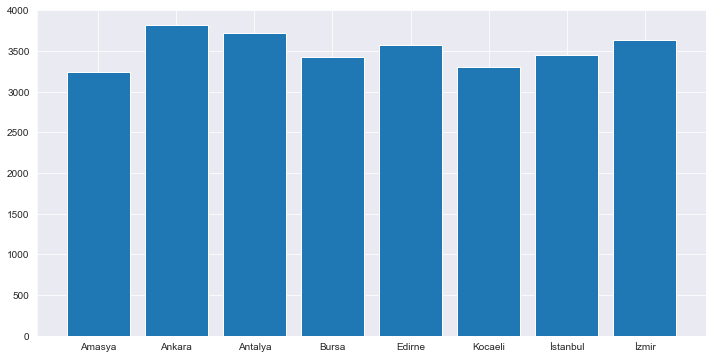

In [79]:
#matplotlib

plt.figure(figsize = (12,6))

plt.bar(data = df.groupby('user_city').agg({'total_amount':'mean'}).reset_index(), 
        x = 'user_city',
        height = 'total_amount')
    
plt.show()

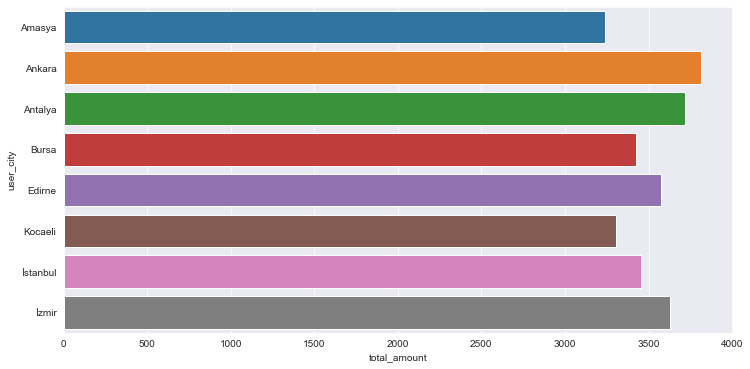

In [80]:
# Creating bar chart in seaborn

plt.figure(figsize = (12,6))
sns.barplot(data = df.groupby('user_city').agg({'total_amount':'mean'}).reset_index(), 
        y ='user_city',
        x ='total_amount')
plt.show()

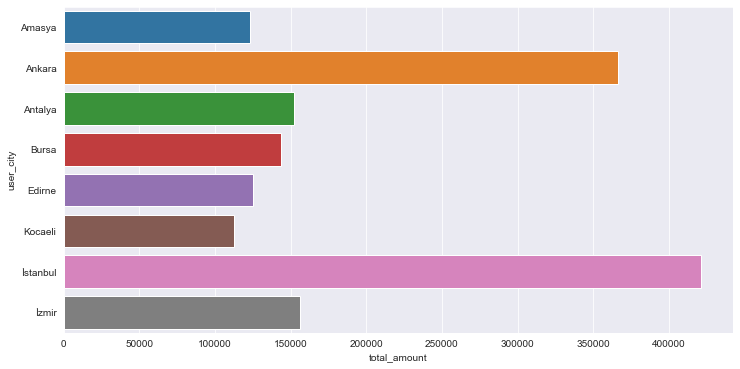

In [81]:
# Find total money they spend based on cities
#You can write max or min instead of sum, and see them on bar chart

plt.figure(figsize = (12,6))
sns.barplot(data = df.groupby('user_city').agg({'total_amount':'sum'}).reset_index(), 
        y = 'user_city',
        x = 'total_amount')
plt.show()

## Seaborn Styles

There are multiple options for the background in seaborn such as;

### -  sns.set_style('darkgrid')
### -  sns.set_style('whitegrid')
### -  sns.set_style('dark')
### -  sns.set_style('white')

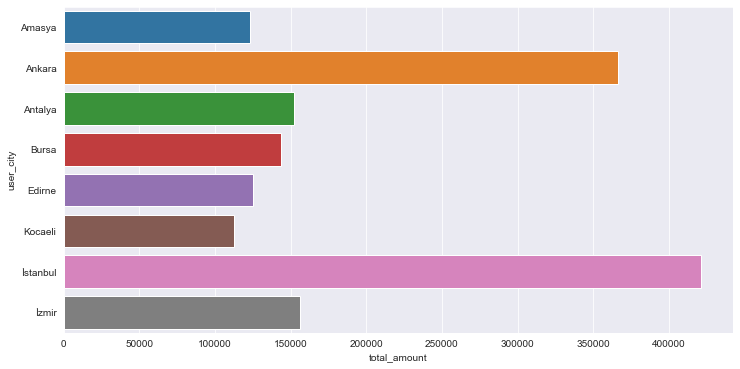

In [82]:
sns.set_style('darkgrid')
#sns.set_style('whitegrid')
#sns.set_style('dark')
# sns.set_style('white')

## seaborn

plt.figure(figsize = (12,6))
sns.barplot(data = df.groupby('user_city').agg({'total_amount':'sum'}).reset_index(), 
        y = 'user_city',
        x = 'total_amount')
plt.show()

# EXAMPLE - 2

Create a bar chart that shows credit card total amount they spent vs user gender with mathplot and seaborn libraries.


In [83]:
df.head()

,have_credit_card,card_no,user_id,user_gender,user_age,user_city,total_amount,card_delivery_date
0,Yes,9871326599442434,1,Female,51,Edirne,3466,2022-01-03
1,Yes,5866643196858919,2,Male,33,İstanbul,2770,2022-01-22
2,Yes,5934969821915385,4,Female,45,İzmir,3990,2022-01-29
3,Yes,4583682992593297,5,Female,33,İstanbul,1876,2022-02-18
4,Yes,9834784352689854,6,Male,41,Ankara,4797,2022-02-07


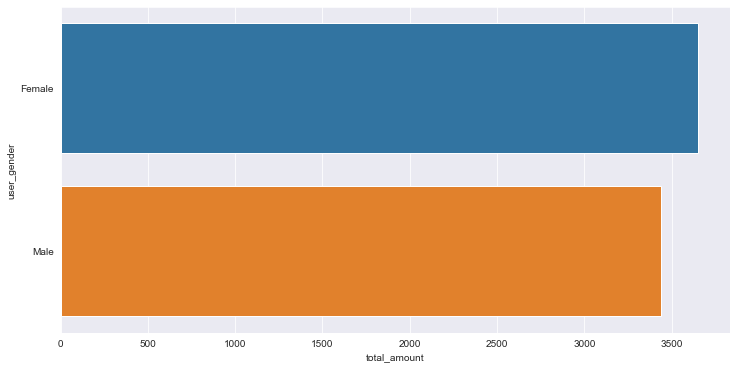

In [84]:
plt.figure(figsize = (12,6))
sns.barplot(data = df.groupby('user_gender').agg({'total_amount':'mean'}).reset_index(), 
        y='user_gender',
        x='total_amount')
plt.show()

## 2. Pie Chart

- Pie chart is generally used when trying to compare the catagorical data.
- Pie charts are ideal for giving a quick idea of the proportional distribution of data to the reader.
- <code>plt.pie</code> is used for creating pie chart, 
- It is of two main parameters as **x** and **labels**.


### Number of Observations of Cities

- Plot the number of credit card users based on cities.

In [85]:
df.groupby('user_city').agg({'user_id': 'count'}).reset_index()

,user_city,user_id
0,Amasya,38
1,Ankara,96
2,Antalya,41
3,Bursa,42
4,Edirne,35
5,Kocaeli,34
6,İstanbul,122
7,İzmir,43


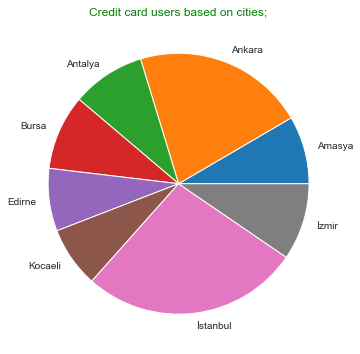

In [86]:
plt.figure(figsize = (14,6))

plt.pie(data = df.groupby('user_city').agg({'user_id': 'count'}).reset_index(),
       x = 'user_id',
       labels = 'user_city')

plt.title('Credit card users based on cities;', size = 12, color = 'green')
plt.show()

## Seaborn "Countplot" has the same function as "Pie Chart"!

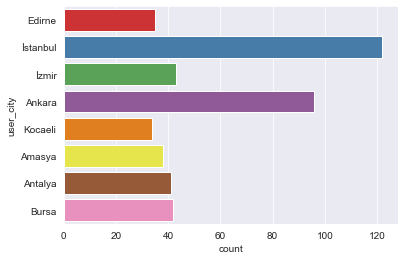

In [87]:
# Color Palettes

sns.countplot(data = df,
             y = 'user_city',
            # color ='pink'
             palette = 'Set1')

plt.show()

# EXAMPLE - 3

- Show the user numbers with Countplot or Pie Chart based on genders.


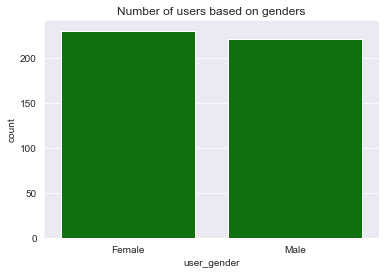

In [88]:
# Color Palettes

sns.countplot(data = df,
             x ='user_gender',
             color = 'green')
plt.title('Number of users based on genders', size = 12)
plt.show()

## 3. Scatter Plot

- If you have two variables that pair well together, plotting them on a scatter diagram is a great way to view their relationship and see if it's a positive or negative correlation. 
- Even if we cannot understand the reason of the relationship, we can understand if there is a relationship or how strong the it is.
- <code>plt.scatter</code> is used to create a scatter plot with Matplotlib.


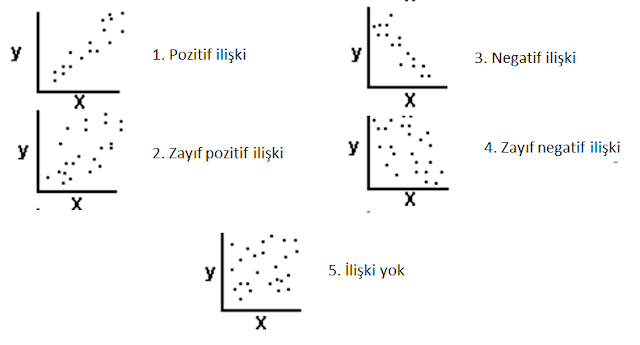

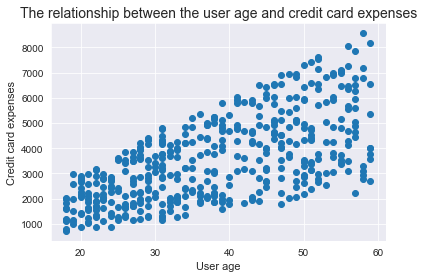

In [89]:
plt.scatter(data = df,
           x = 'user_age',
           y = 'total_amount')


plt.title('The relationship between the user age and credit card expenses', size = 14)
plt.xlabel('User age',size = 11)
plt.ylabel('Credit card expenses',size = 11)

plt.show()

## 4. Line Chart

- Line charts are used to represent quantitative data collected over a specific subject and a specific time interval. 
- Generally we write dates/days on **x-axis** and quantitative data on **y-axis**
- <code>plt.plot</code> is used to create a scatter plot with Matplotlib.



## Show the number of users who received credit cards on the basis of dates with a line chart


In [90]:
df['card_delivery_date'].value_counts()

2022-01-23    14
2022-02-18    13
2022-01-25    13
2022-01-06    13
2022-01-01    12
2022-01-30    12
2022-01-21    12
2022-01-11    11
2022-02-03    10
2022-01-10    10
2022-02-08    10
2022-01-28    10
2022-02-19    10
2022-01-12    10
2022-01-03    10
2022-01-16     9
2022-02-02     9
2022-01-17     9
2022-02-11     8
2022-01-04     8
2022-02-25     8
2022-01-18     8
2022-01-31     8
2022-02-16     8
2022-02-17     8
2022-01-08     8
2022-02-27     8
2022-02-23     7
2022-02-07     7
2022-01-09     7
2022-01-29     7
2022-01-05     7
2022-01-22     7
2022-02-14     7
2022-01-20     7
2022-01-14     7
2022-01-27     7
2022-02-04     7
2022-02-15     6
2022-02-10     6
2022-02-13     6
2022-01-19     6
2022-02-21     6
2022-01-15     6
2022-02-06     6
2022-02-12     6
2022-02-28     6
2022-02-22     6
2022-01-07     5
2022-02-01     5
2022-02-09     5
2022-02-05     5
2022-01-24     4
2022-02-24     4
2022-01-02     4
2022-01-26     4
2022-02-20     4
2022-02-26     3
2022-01-13    

In [91]:
df['card_delivery_date'].dtype

dtype('O')

In [92]:
#Convert it to date format
#type(pd.to_datetime('2022-01-03'))

pd.to_datetime('2022-01-03')

Timestamp('2022-01-03 00:00:00')

In [93]:
df['card_delivery_date'] = pd.to_datetime(df['card_delivery_date'])
df

,have_credit_card,card_no,user_id,user_gender,user_age,user_city,total_amount,card_delivery_date
0,Yes,9871326599442434,1,Female,51,Edirne,3466,2022-01-03
1,Yes,5866643196858919,2,Male,33,İstanbul,2770,2022-01-22
2,Yes,5934969821915385,4,Female,45,İzmir,3990,2022-01-29
3,Yes,4583682992593297,5,Female,33,İstanbul,1876,2022-02-18
4,Yes,9834784352689854,6,Male,41,Ankara,4797,2022-02-07
...,...,...,...,...,...,...,...,...
446,Yes,2498987169455237,495,Female,43,Antalya,5895,2022-01-11
447,Yes,8483732676742838,496,Female,50,İzmir,5930,2022-01-18
448,Yes,5169329597692651,497,Male,52,Kocaeli,2675,2022-02-06
449,Yes,2676259853575781,499,Male,45,Antalya,2687,2022-02-04


In [95]:
card_df = df.groupby('card_delivery_date').agg({'user_id':'count'}).reset_index()

In [53]:
card_df

,card_delivery_date,user_id
0,2022-01-01,12
1,2022-01-02,4
2,2022-01-03,10
3,2022-01-04,8
4,2022-01-05,7
5,2022-01-06,13
6,2022-01-07,5
7,2022-01-08,8
8,2022-01-09,7
9,2022-01-10,10


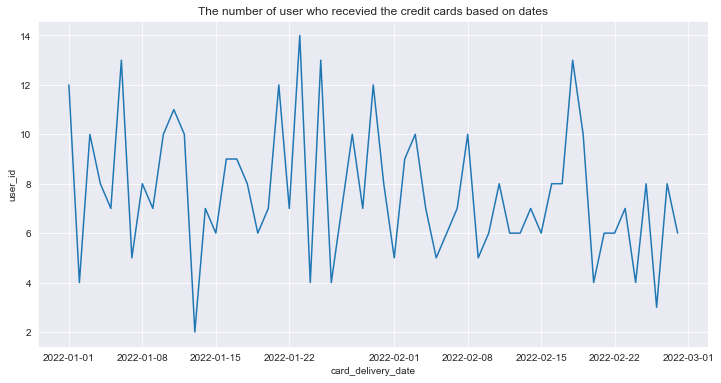

In [96]:
plt.figure(figsize = (12,6))

sns.lineplot(data = card_df,
            x = 'card_delivery_date',
            y = 'user_id')

plt.title('The number of user who recevied the credit cards based on dates', size = 12)

plt.show()

## 5. Histogram

- Histogram is used when the data are numerical.
- They display the shape of the data's frequency distribution, especially when determining whether the output of a process is distributed approximately normally.


## Show the distribution of total expenditure with histogram 

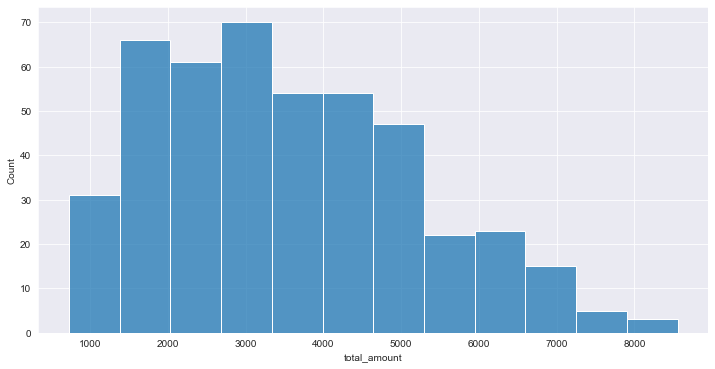

In [97]:
plt.figure(figsize = (12,6))
sns.histplot(data = df,
            x = 'total_amount')

plt.show()

# EXAMPLE - 4

Show age distribution with histogram.

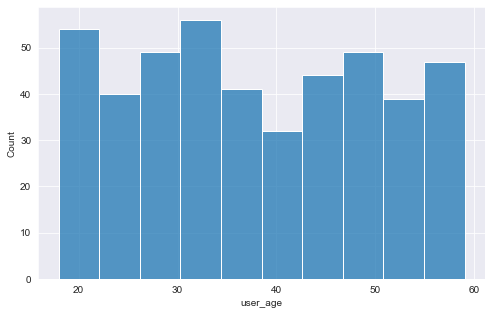

In [98]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'user_age')

plt.show()

# Plotly

- Plotly is a sophisticated data visualization library that is suited for creating elaborate plots efficiently. 
- It is an open source tool, and has 40 different visualization package.
- It has 2 main parameters as **data** and **layout**.
- **Data** is the part where we specify the visualization type and data.
- **Layout** is the part where we specify the graph features such as titles, color, size, theme etc.



In [ ]:
!pip install plotly

In [99]:
import plotly.graph_objs as go

from plotly.offline import iplot

In [39]:
# Total spending amaounts based on the cities where users live 

bar_df = df.groupby('user_city').agg({'total_amount' : 'sum'}).reset_index()

In [100]:
bar = go.Bar(x = bar_df['user_city'],
      y = bar_df['total_amount'])

fig = go.Figure(data = bar)

iplot(fig)

In [101]:
scatter = go.Scatter(x = df['user_age'],
          y = df['total_amount'],
                   mode ='markers')

fig = go.Figure(data = scatter)
iplot(fig)

In [102]:
scatter = go.Scatter(x = df['user_age'],
          y = df['total_amount'],
                   mode = 'markers',
                   marker = dict(size = 8,
                               color = 'blue',
                               opacity = 0.65)
                    )

layout = go.Layout(title = dict(text = 'The relationship between user age and total expenditure'),
                   xaxis = dict(title = 'Age'),
                   yaxis = dict(title = 'How much they spent'))

fig = go.Figure(data = scatter, layout = layout)

iplot(fig)


### Relationship of Age-Total Expenditure Based on Genders 

In [103]:
male = df.loc[df['user_gender'] == 'Male']
female = df.loc[df['user_gender'] == 'Female']


male_scatter = go.Scatter(x = male['user_age'],
                        y = male['total_amount'],
                        mode = 'markers',
                        name = 'Male')

female_scatter = go.Scatter(x = female['user_age'],
                        y = female['total_amount'],
                        mode ='markers',
                        name ='Feale')

gender_layout = go.Layout(title = dict(text = 'Age-Total Expenditure Relationship Based on Genders'),
                         xaxis = dict(title ='Age'),
                         yaxis = dict(title = 'Total Expenditure'),
                         template = 'plotly_dark')                          
                         
fig = go.Figure (data = [male_scatter, female_scatter], layout = gender_layout)
                         
iplot(fig)
                         



# FINAL PROJECT

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
def city_analysis():
    
    city = str(input('Enter a city: '))
    
    if city not in df['user_city'].unique():
        
        print('The city you enter is not on our list.. Sorry :(')
        
    else:
    
        city_data = df.loc[df['user_city'] == city]
        
        bar_df = city_data.groupby('user_gender').agg({'total_amount': 'mean'}).reset_index()
        
        fig = make_subplots(rows = 1,
                            cols = 2,
                            subplot_titles = ['Average consumption based on gender',
                                              'Age & Consumption Relationship'])
        
        fig.add_trace(go.Bar(x = bar_df['user_gender'],
                             y = bar_df['total_amount'],
                             showlegend = False),
                      
                      row = 1, col = 1)
        
        fig.add_trace(go.Scatter(x = city_data['total_amount'],
                                y = city_data['user_age'],
                                showlegend = False,
                                mode = 'markers'),
                     
                     row = 1, col = 2)
        
        fig.update_layout(title = dict(text = city + ' Credit Card Consumption Analysis ',
                                      x = 0.5),
                         xaxis = dict(title = 'Gender'),
                         yaxis = dict(title = 'Total Expenditure'),
                         xaxis2 = dict(title = 'Total Expenditure'),
                         yaxis2 = dict(title = 'Age'),
                         template = 'plotly_dark')
        
        iplot(fig)

In [106]:
city_analysis()

Enter a city: İstanbul
